In [3]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
pip install tqdm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:

pip install --upgrade opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_path = 'Dataset/TRAIN'
test_path = 'Dataset/TEST'


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob





2025-02-09 15:40:02.757113: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 15:40:03.021116: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 15:40:03.288697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739095803.571875    4949 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739095803.657589    4949 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 15:40:04.180224: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [10]:
import os
from PIL import Image

def is_valid_image(file_path):
    """Check if an image is valid."""
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify if it's a valid image
        return True
    except (IOError, OSError):
        return False

def remove_corrupted_images(dataset_path):
    """Remove corrupted images from a dataset folder."""
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):  # Ensure it's a directory
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                if not is_valid_image(file_path):
                    print(f"Removing corrupted image: {file_path}")
                    os.remove(file_path)  # Delete corrupted image


# Remove corrupted images from both train and test sets
remove_corrupted_images(train_path)
remove_corrupted_images(test_path)

print("✅ Corrupted images removed successfully!")


✅ Corrupted images removed successfully!


In [11]:
import os
import cv2
import pandas as pd
from tqdm import tqdm
from glob import glob
from PIL import Image

x_data = []
y_data = []
skipped_images = []  # List to store corrupted images
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')  # Supported formats

for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        if file.lower().endswith(valid_extensions):
            try:
                # Check if image is valid
                with Image.open(file) as img:
                    img.verify()  # Validate image integrity
                
                # Read image with OpenCV
                img_array = cv2.imread(file)
                
                if img_array is not None:
                    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                    x_data.append(img_array)
                    y_data.append(category.split('/')[-1])
                else:
                    skipped_images.append(file)
            
            except (IOError, OSError, cv2.error, Image.DecompressionBombError):
                skipped_images.append(file)

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Print summary instead of printing in loop
print(f"Skipped {len(skipped_images)} corrupted images.")


  0%|          | 0/9947 [00:00<?, ?it/s]

100%|██████████| 12537/12537 [00:17<00:00, 701.67it/s]

Skipped 0 corrupted images.


In [12]:
data.shape

(22484, 2)

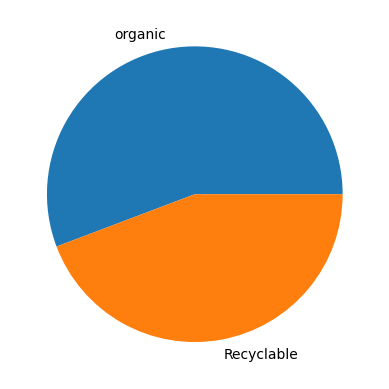

In [13]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','Recyclable'])
plt.show()

label
O    12537
R     9947
Name: count, dtype: int64
['O', 'R']


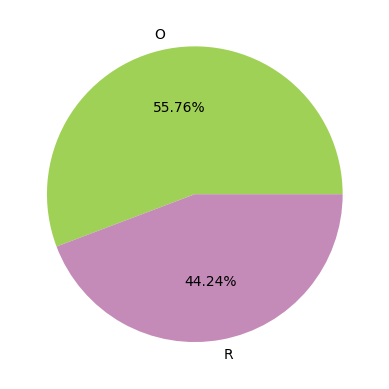

In [14]:
import matplotlib.pyplot as plt

# Get the value counts for the labels
label_counts = data['label'].value_counts()
print(label_counts)

# Use the unique labels dynamically instead of hardcoding
labels = label_counts.index.tolist()
print(labels)
# Plot the pie chart
plt.pie(label_counts, labels=labels, colors=['#a0d157','#c48bb8'],autopct='%0.2f%%', )
plt.show()


In [15]:
print(f"Total images processed: {len(x_data)}")
print(f"Categories found: {set(y_data)}")


Total images processed: 22484
Categories found: {'O', 'R'}


In [16]:
avg_height = np.mean([img.shape[0] for img in img_array])
avg_width = np.mean([img.shape[1] for img in img_array])
print(f"Average image dimensions: {avg_height:.2f}x{avg_width:.2f}")

print(f"Category with the most images: {label_counts.idxmax()} ({label_counts.max()} images)")
print(f"Category with the least images: {label_counts.idxmin()} ({label_counts.min()} images)")


Average image dimensions: 275.00x3.00
Category with the most images: O (12537 images)
Category with the least images: R (9947 images)


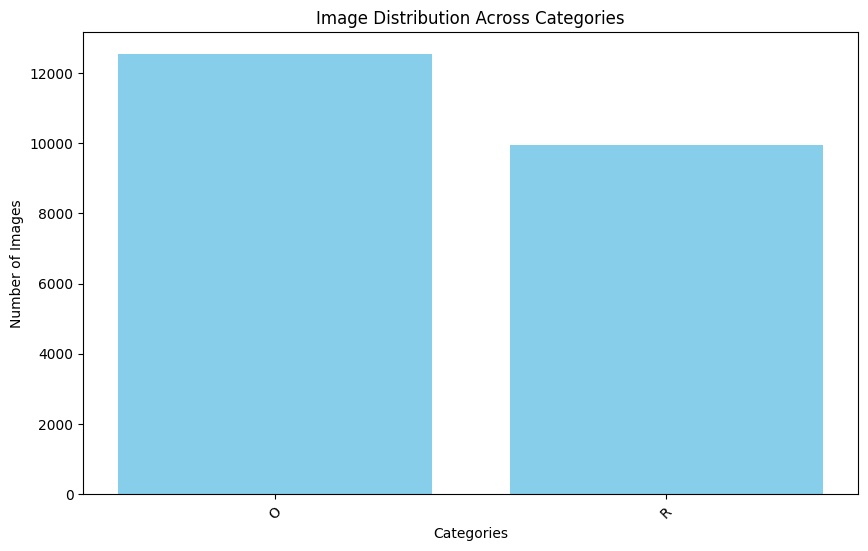

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Image Distribution Across Categories')
plt.xticks(rotation=45)
plt.show()


In [18]:
import streamlit as st

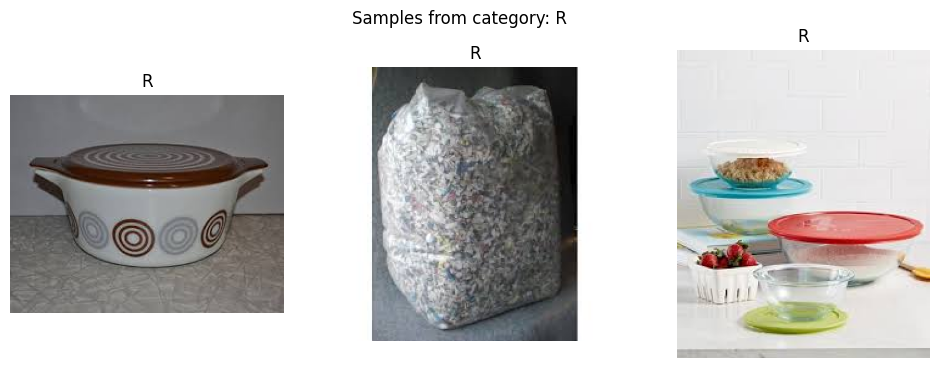

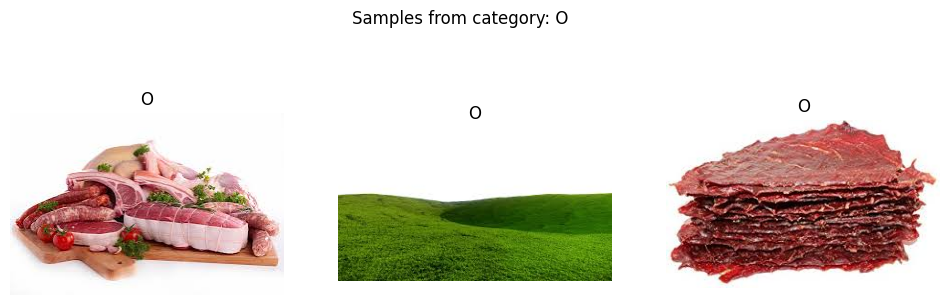

In [19]:
import random

def show_samples_by_category(data, num_samples=3):
    categories = data['label'].unique()
    for category in categories:
        category_images = data[data['label'] == category]['image'].tolist()
        sampled_images = random.sample(category_images, min(len(category_images), num_samples))
        plt.figure(figsize=(12, 4))
        for i, img in enumerate(sampled_images):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
        plt.suptitle(f"Samples from category: {category}")
        plt.show()

show_samples_by_category(data)


In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Resize and normalize images using Scikit-learn
def preprocess_images(images, target_size=(128, 128)):
    resized_images = [
        cv2.resize(img, target_size, interpolation=cv2.INTER_AREA) for img in images
    ]
    resized_images = np.array(resized_images)
    # Normalize pixel values to 0-1 range
    scaler = MinMaxScaler()
    flattened_images = resized_images.reshape(resized_images.shape[0], -1)
    normalized_images = scaler.fit_transform(flattened_images).reshape(resized_images.shape)
    return normalized_images

# Apply preprocessing
preprocessed_images = preprocess_images(img_array)
print(f"Processed image shape: {preprocessed_images.shape}")


Processed image shape: (183, 128, 128)


In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Flatten images for PCA
flattened_images = preprocessed_images.reshape(preprocessed_images.shape[0], -1)

# Apply PCA
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(flattened_images)

# Apply K-Means clustering
num_clusters = len(np.unique(labels))  # Cluster count = number of classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

print(f"PCA explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")
print(f"Cluster assignments: {clusters}")


PCA explained variance ratio: 0.95
Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"]
               )
batch_size=64

2025-02-09 15:41:03.154200: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-02-09 15:41:03.518340: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2025-02-09 15:41:03.710083: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2025-02-09 15:41:03.851025: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [58]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)
test_generator= test_datagen.flow_from_directory(
    train_path,
   target_size=(224, 224),
batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22484 images belonging to 2 classes.
Found 22484 images belonging to 2 classes.


In [26]:
#hist = model.fit(train_generator,epochs=15,validation_data=test_generator,)
import os
import shutil
from glob import glob

new_train_path = "/home/prathmesh/Desktop/wasteplasticclassification/Dataset3/TRAIN"
train_generator = train_datagen.flow_from_directory(
    new_train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)
test_generator= train_datagen.flow_from_directory(
    new_train_path,
   target_size=(224, 224),
batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 2003 images belonging to 2 classes.
Found 2003 images belonging to 2 classes.


In [27]:
model.load_weights("emergency_backup.weights.h5")  # Use your saved weights file


2025-02-09 15:41:07.706895: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.


In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a checkpoint callback
checkpoint_callback = ModelCheckpoint(
    "model_checkpoint.h5",  # File where model will be saved
    save_best_only=True,     # Saves only the best model (based on val_loss)
    monitor="val_loss",      # Track validation loss
    mode="min",              # Save when val_loss decreases
    verbose=1                # Print saving status
)


In [62]:
from tensorflow.keras.models import load_model

model =load_model("final_model.h5", compile=True)

In [ ]:
hist = model.fit(
    train_generator,
    epochs=15,  # Continue training up to epoch 15
    validation_data=test_generator,
    callbacks=[checkpoint_callback],
    initial_epoch=14  # Replace with the last completed epoch
)

In [48]:
loss, acc = model.evaluate(train_generator)
print(f"Test Accuracy: {acc}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8436 - loss: 0.3706
Test Accuracy: 0.8452321290969849


In [54]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()


352/352 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.8270 - loss: 0.4082
Final Model Accuracy: 0.8248


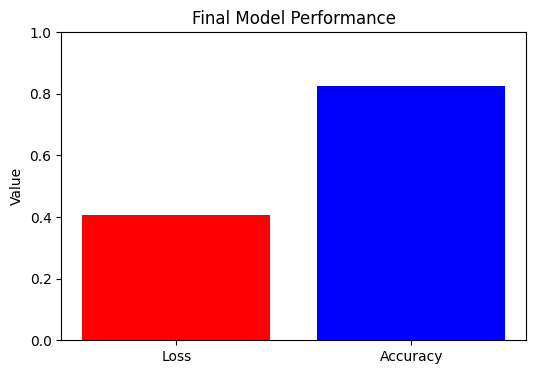

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Final Model Accuracy: {acc:.4f}")

plt.figure(figsize=(6, 4))
plt.bar(["Loss", "Accuracy"], [loss, acc], color=['red', 'blue'])
plt.ylabel("Value")
plt.title("Final Model Performance")
plt.ylim(0, 1)  # Set limits based on scale (adjust if needed)
plt.show()

In [67]:
model.save("final_model.h5")  # Saves the entire model (architecture + weights)


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history["val_loss"], label="validation boss")
plt.legend()
plt.show()


In [70]:
def pr(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img=cv2.resize(img,(224,224))
    img=np.reshape(img,[-1,224,224,3])
    print("Test image shape:", img.shape)
    result=np.argmax(model.predict(img))
    if result == 0:
        print("the image shown in Recyclabel waste ")
    elif result == 1:
        print("oraganic waste")

Test image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
oraganic waste


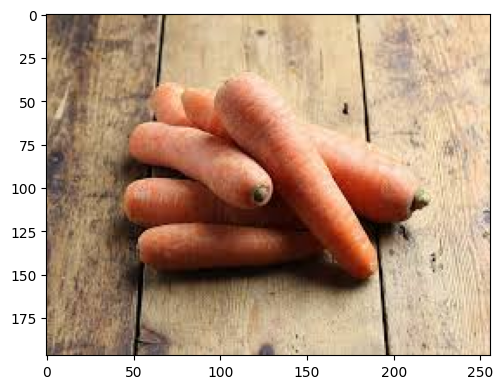

In [81]:
test_img=cv2.imread("/home/prathmesh/Desktop/wasteplasticclassification/Dataset/TEST/O/O_12577.jpg")
pr(test_img)

In [41]:
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,783,752 (254.76 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,522,502 (169.84 MB)